# California House Pricing Prediction Model

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Fetching the dataset

In [2]:
import os
import tarfile
import urllib
dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path, "housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()
fetch_data()
def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)
df = load_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
df.shape

(20640, 10)

This dataset contains 20640 rows and 10 columns

In [5]:
 df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1.0, 'Houses across the state of California (CA)')

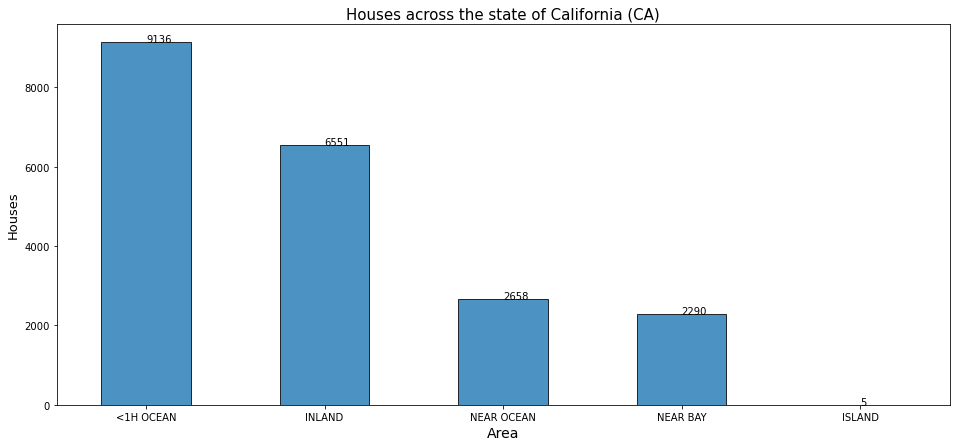

In [6]:
plt.figure(figsize=(16,7))
df['ocean_proximity'].value_counts().plot(kind='bar',edgecolor='k', alpha=0.8)
  
for index, value in enumerate(df['ocean_proximity'].value_counts()):
    plt.text(index, value, str(value))
plt.xlabel("Area", fontsize=14)
plt.ylabel("Houses", fontsize=13)
plt.xticks(rotation=0)
plt.title("Houses across the state of California (CA)", fontsize=15)


### Inference:
- Maximum number of houses have ocean proximity of <1H OCEAN.
- Least number of houses have ocean proximity of ISLAND.


C:\Users\kashi\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Houses')

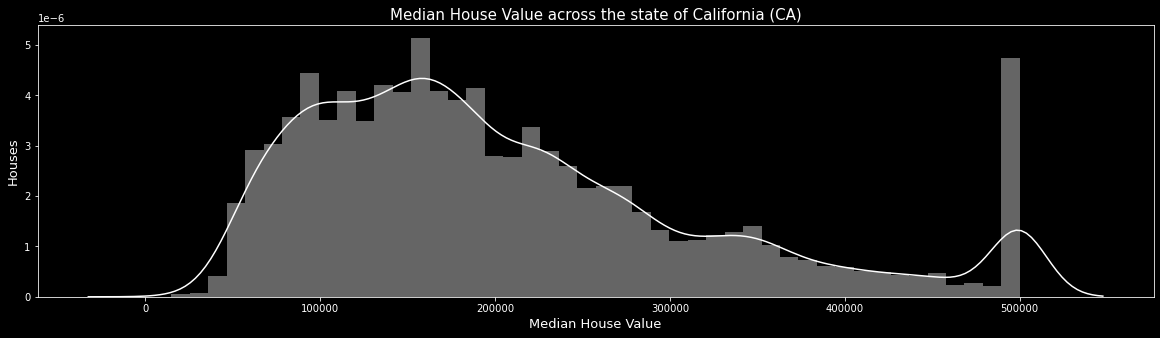

In [50]:
plt.figure(figsize=(20,5))
sns.set_color_codes(palette="bright")
sns.distplot(df['median_house_value'],color='w')
plt.title("Median House Value across the state of California (CA)", fontsize=15)
plt.xlabel("Median House Value", fontsize=13)
plt.ylabel("Houses", fontsize=13)

### Inference:
- Maximum distribution of houses are around 100000 and 200000 Median House Value. 
- 500000 median house value has the least distribution of houses.


Text(0.5, 85.99999999999991, 'latitude')

<Figure size 864x576 with 0 Axes>

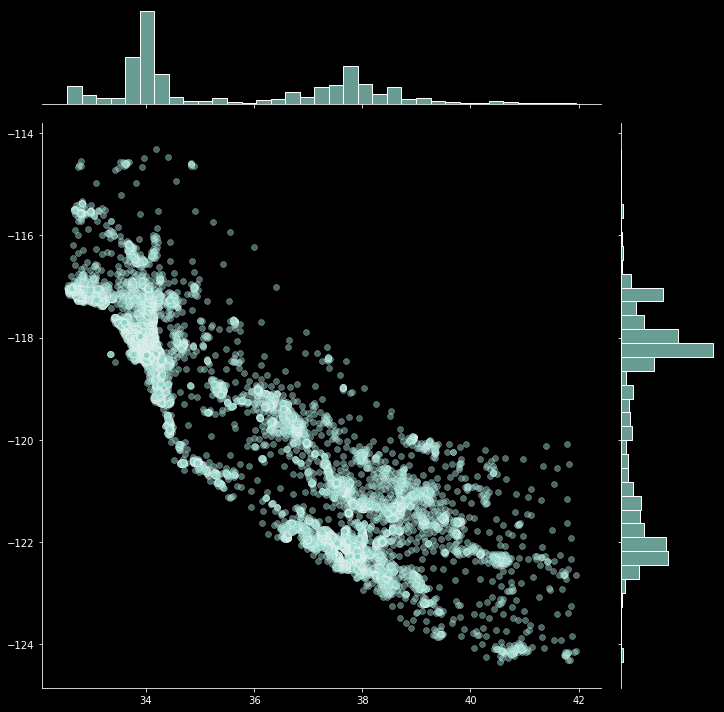

In [51]:
plt.figure(figsize=(12,8))
sns.jointplot(x=df.latitude.values,y=df.longitude.values,height=10, alpha=0.5)
plt.ylabel("longitude")
plt.xlabel("latitude")

### Plot of two variables(latitude and longitude) with bivariate and univariate graphs
#### Inference:
- Density of houses between 36 to 38 latitude and -124 to -120 longitude is maximum.
- But density of houses between 36 to 38 latitude but -120 to -114 longitude are scattered more and least in number.

In [9]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Only the feature of total_bedrooms has 207 null values.

In [60]:
df_shuff = df.sample(n=len(df))

Shuffle the values of the dataset so that while splitting the values into train and test datasets, every possibity is considered.

In [12]:
df_shuff

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16448,-121.27,38.14,33.0,3557.0,894.0,2659.0,894.0,2.2883,86900.0,INLAND
19721,-121.91,39.14,45.0,845.0,155.0,343.0,136.0,2.1250,62000.0,INLAND
15137,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,174400.0,<1H OCEAN
12382,-116.38,33.73,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,134500.0,INLAND
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,218000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
19365,-123.08,38.38,28.0,3297.0,676.0,923.0,373.0,3.9167,232600.0,NEAR OCEAN
16082,-122.48,37.73,52.0,1597.0,240.0,566.0,231.0,5.1681,500001.0,NEAR OCEAN
11075,-117.85,33.81,26.0,4186.0,767.0,2447.0,777.0,4.9917,248100.0,<1H OCEAN
3861,-118.44,34.16,35.0,3080.0,642.0,1362.0,623.0,4.1218,328500.0,<1H OCEAN


In [13]:
df_shuff = df.drop_duplicates()
df_shuff.duplicated().values.any()

False

Drop the duplicate values from the shuffled dataset.

In [14]:
df_shuff = df_shuff.fillna(method="ffill")
pd.isnull(df_shuff).any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

Instead of removing the rows with null values which might affect the prediction, fill the null values with the values of the previous row or column.

In [15]:
df_shuff.shape

(20640, 10)

## Feature Engineering

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- population_per_household = population / households


In [63]:
df_shuff['rooms_per_household'] = df_shuff['total_rooms']/ df_shuff['households']
df_shuff['bedrooms_per_household'] = df_shuff['total_bedrooms']/ df_shuff['total_rooms']
df_shuff['pop_per_household'] = df_shuff['population']/ df_shuff['households']

In [64]:
df_shuff.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'pop_per_household'],
      dtype='object')

In [65]:
df_shuff.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,pop_per_household
11727,-120.02,39.24,22.0,2309.0,571.0,919.0,342.0,3.0057,93600.0,INLAND,6.751462,0.247293,2.687135
9932,-122.30,38.29,25.0,1701.0,427.0,1021.0,399.0,3.0404,142100.0,NEAR BAY,4.263158,0.251029,2.558897
3302,-122.60,38.93,16.0,1657.0,390.0,572.0,301.0,1.4767,62000.0,INLAND,5.504983,0.235365,1.900332
3155,-118.44,35.13,34.0,1170.0,290.0,602.0,266.0,1.7917,80000.0,INLAND,4.398496,0.247863,2.263158
6806,-118.09,34.09,36.0,1068.0,246.0,949.0,250.0,2.3462,188500.0,<1H OCEAN,4.272000,0.230337,3.796000


#### Correlation between different features of the dataset

In [66]:
df_shuff.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,pop_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


<AxesSubplot:>

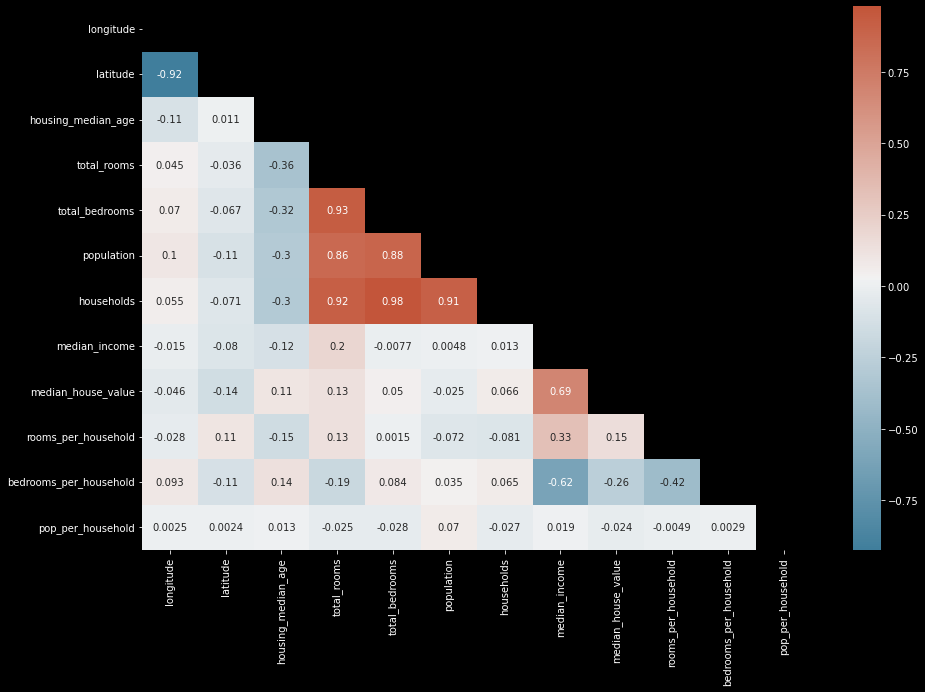

In [67]:
f, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(df_shuff.corr(), dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_shuff.corr(), annot=True, mask = mask, cmap=cmap)

### Inference:
- median_house_value has maximum positive correlation with median_income and next with rooms_per_household
- median_house_value has maximum negative correlation with bedrooms_per_household


### Converting categorical ocean proximity data into numbers

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [22]:
label = LabelEncoder()

In [68]:
df_shuff['ocean_proximity_num'] = label.fit_transform(df_shuff['ocean_proximity'])
df_shuff

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,pop_per_household,ocean_proximity_num
11727,-120.02,39.24,22.0,2309.0,571.0,919.0,342.0,3.0057,93600.0,INLAND,6.751462,0.247293,2.687135,1
9932,-122.30,38.29,25.0,1701.0,427.0,1021.0,399.0,3.0404,142100.0,NEAR BAY,4.263158,0.251029,2.558897,3
3302,-122.60,38.93,16.0,1657.0,390.0,572.0,301.0,1.4767,62000.0,INLAND,5.504983,0.235365,1.900332,1
3155,-118.44,35.13,34.0,1170.0,290.0,602.0,266.0,1.7917,80000.0,INLAND,4.398496,0.247863,2.263158,1
6806,-118.09,34.09,36.0,1068.0,246.0,949.0,250.0,2.3462,188500.0,<1H OCEAN,4.272000,0.230337,3.796000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15308,-117.37,33.19,38.0,861.0,213.0,486.0,204.0,4.1875,185000.0,NEAR OCEAN,4.220588,0.247387,2.382353,4
5323,-118.44,34.05,20.0,5943.0,1538.0,2492.0,1429.0,4.1141,305000.0,<1H OCEAN,4.158852,0.258792,1.743877,0
2590,-124.09,40.88,31.0,1982.0,495.0,1052.0,467.0,1.5326,74100.0,NEAR OCEAN,4.244111,0.249748,2.252677,4
10153,-117.90,33.90,18.0,3821.0,576.0,1430.0,568.0,6.9399,349600.0,<1H OCEAN,6.727113,0.150746,2.517606,0


In [69]:
df_shuff = df_shuff.drop('ocean_proximity', axis=1)

In [70]:
df_shuff.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,pop_per_household,ocean_proximity_num
11727,-120.02,39.24,22.0,2309.0,571.0,919.0,342.0,3.0057,93600.0,6.751462,0.247293,2.687135,1
9932,-122.30,38.29,25.0,1701.0,427.0,1021.0,399.0,3.0404,142100.0,4.263158,0.251029,2.558897,3
3302,-122.60,38.93,16.0,1657.0,390.0,572.0,301.0,1.4767,62000.0,5.504983,0.235365,1.900332,1
3155,-118.44,35.13,34.0,1170.0,290.0,602.0,266.0,1.7917,80000.0,4.398496,0.247863,2.263158,1
6806,-118.09,34.09,36.0,1068.0,246.0,949.0,250.0,2.3462,188500.0,4.272000,0.230337,3.796000,0


In [71]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_shuff[['ocean_proximity_num']]).toarray())
df_shuff = df_shuff.join(enc_df)
df_shuff

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,pop_per_household,ocean_proximity_num,0,1,2,3,4
11727,-120.02,39.24,22.0,2309.0,571.0,919.0,342.0,3.0057,93600.0,6.751462,0.247293,2.687135,1,1.0,0.0,0.0,0.0,0.0
9932,-122.30,38.29,25.0,1701.0,427.0,1021.0,399.0,3.0404,142100.0,4.263158,0.251029,2.558897,3,0.0,0.0,0.0,0.0,1.0
3302,-122.60,38.93,16.0,1657.0,390.0,572.0,301.0,1.4767,62000.0,5.504983,0.235365,1.900332,1,1.0,0.0,0.0,0.0,0.0
3155,-118.44,35.13,34.0,1170.0,290.0,602.0,266.0,1.7917,80000.0,4.398496,0.247863,2.263158,1,0.0,0.0,0.0,0.0,1.0
6806,-118.09,34.09,36.0,1068.0,246.0,949.0,250.0,2.3462,188500.0,4.272000,0.230337,3.796000,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15308,-117.37,33.19,38.0,861.0,213.0,486.0,204.0,4.1875,185000.0,4.220588,0.247387,2.382353,4,1.0,0.0,0.0,0.0,0.0
5323,-118.44,34.05,20.0,5943.0,1538.0,2492.0,1429.0,4.1141,305000.0,4.158852,0.258792,1.743877,0,0.0,0.0,0.0,0.0,1.0
2590,-124.09,40.88,31.0,1982.0,495.0,1052.0,467.0,1.5326,74100.0,4.244111,0.249748,2.252677,4,1.0,0.0,0.0,0.0,0.0
10153,-117.90,33.90,18.0,3821.0,576.0,1430.0,568.0,6.9399,349600.0,6.727113,0.150746,2.517606,0,1.0,0.0,0.0,0.0,0.0


## Splitting the data into train and test for model prediction

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_shuff.drop('median_house_value', axis=1)
y = df_shuff.iloc[:, 8]

In [29]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  rooms

In [30]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [31]:
df_shuff.dtypes

longitude                 float64
latitude                  float64
housing_median_age        float64
total_rooms               float64
total_bedrooms            float64
population                float64
households                float64
median_income             float64
median_house_value        float64
rooms_per_household       float64
bedrooms_per_household    float64
pop_per_household         float64
ocean_proximity_num         int32
0                         float64
1                         float64
2                         float64
3                         float64
4                         float64
dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')  
imputer.fit(X)
X_train, X_test = imputer.transform(X_train), imputer.transform(X_test)

In [34]:
X_train

array([[-121.63,   39.1 ,   22.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.84,   37.34,   33.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.32,   34.1 ,   52.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-117.23,   32.86,   16.  , ...,    0.  ,    0.  ,    1.  ],
       [-117.13,   32.96,   15.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.01,   33.78,   26.  , ...,    0.  ,    0.  ,    0.  ]])

<AxesSubplot:>

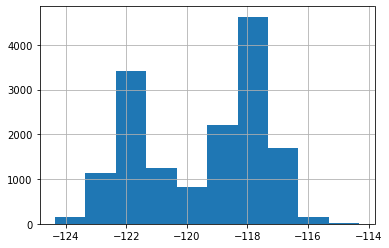

In [35]:
pd.DataFrame(X_train)[0].hist()

<AxesSubplot:>

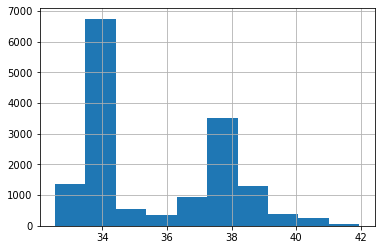

In [36]:
pd.DataFrame(X_train)[1].hist()

In [37]:
X_train.shape , X_test.shape

((15480, 17), (5160, 17))

In [38]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

mse(regressor.predict(X_train), y_train, squared=False)



68184.83116636814

In [39]:
regressor.score(X_train, y_train)

0.6482586881984638

In [40]:
regressor.score( X_test, y_test)

0.646465084476294

In [41]:
y_pred = regressor.predict(X_train)

In [42]:
y_pred

array([139309.82517136, 226833.53047172, 188664.50279861, ...,
       222191.67912812, 295046.93203692, 292968.75633073])

### Our model has an accuracy of 63.84% on testing data and 64.92% on training data

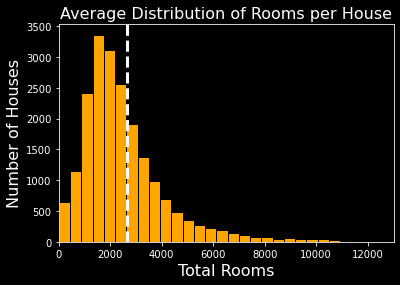

In [53]:
plt.figure()
plt.hist(df.total_rooms, bins = 90, ec = 'black', color = 'orange')
plt.xlim(0,13000)
plt.xlabel('Total Rooms', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Rooms per House', fontsize=16)
plt.axvline(df['total_rooms'].mean(), color='white', linestyle='dashed', linewidth=3, label='Average Price of House in a block')
plt.show()

### Inference: 
Average distribution of houses with respect to rooms per household lies between 2000 - 4000

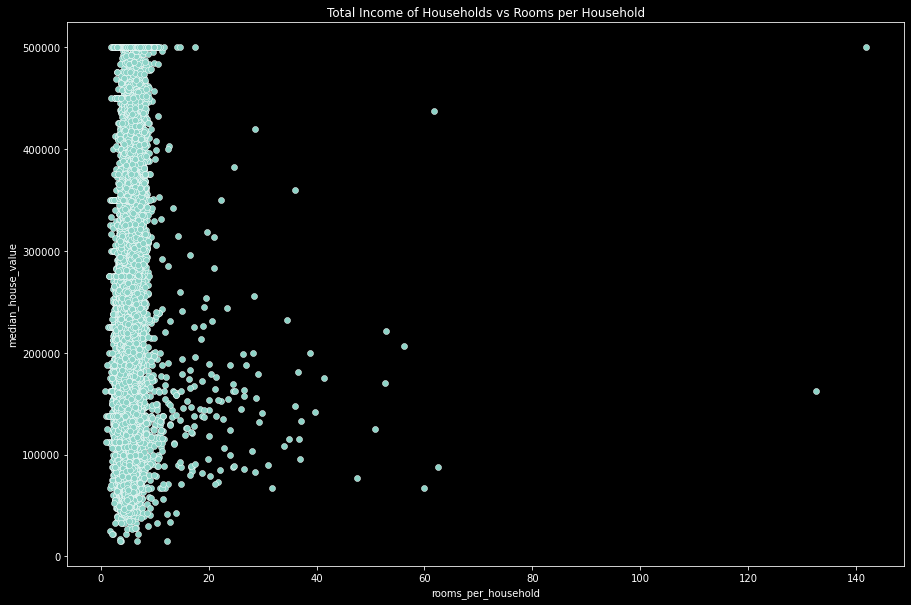

In [54]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'rooms_per_household', y = 'median_house_value'
                ,palette= 'dark', data = df_shuff).set(title="Total Income of Households vs Rooms per Household");

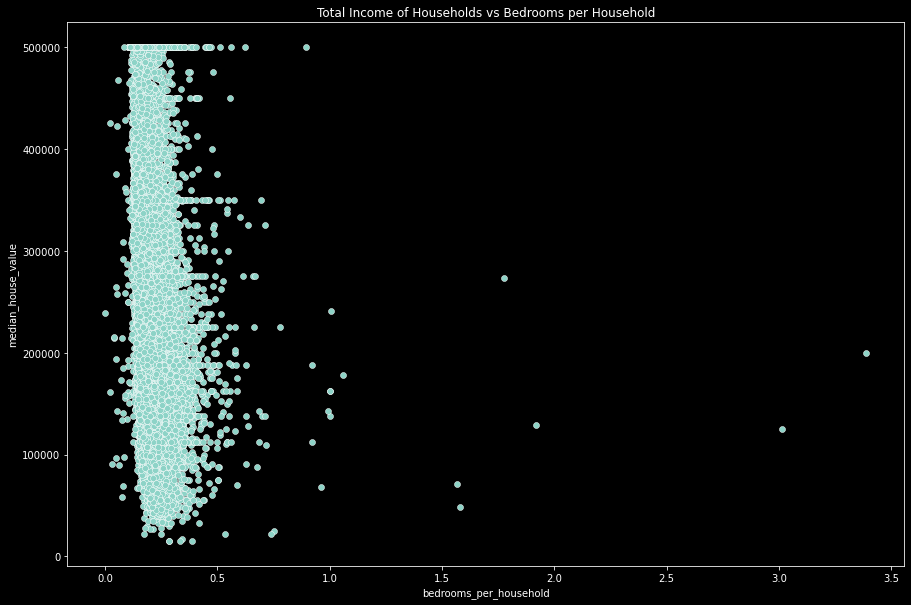

In [55]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'bedrooms_per_household', y = 'median_house_value'
                ,palette= 'dark', data = df_shuff).set(title="Total Income of Households vs Bedrooms per Household");

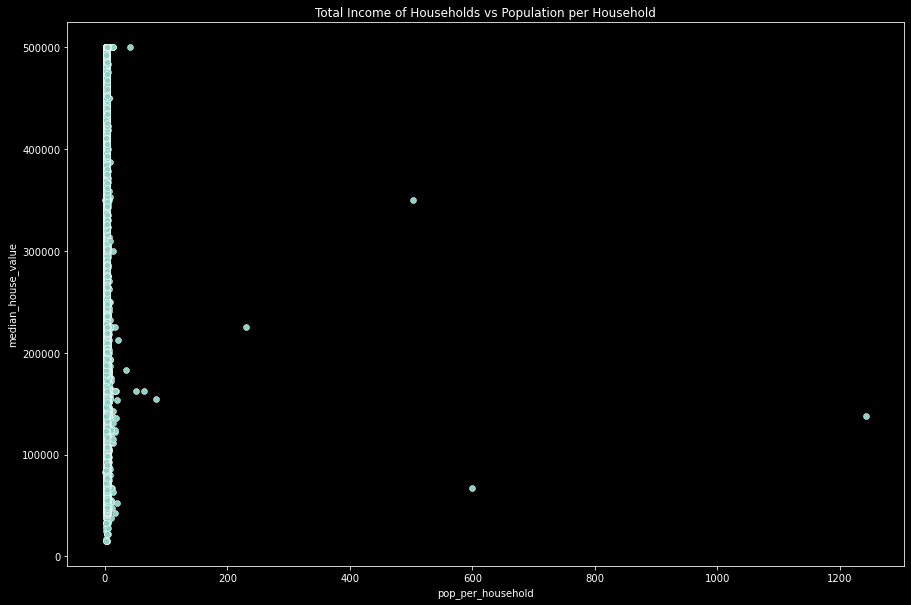

In [56]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'pop_per_household', y = 'median_house_value'
                ,palette= 'dark', data = df_shuff).set(title="Total Income of Households vs Population per Household");

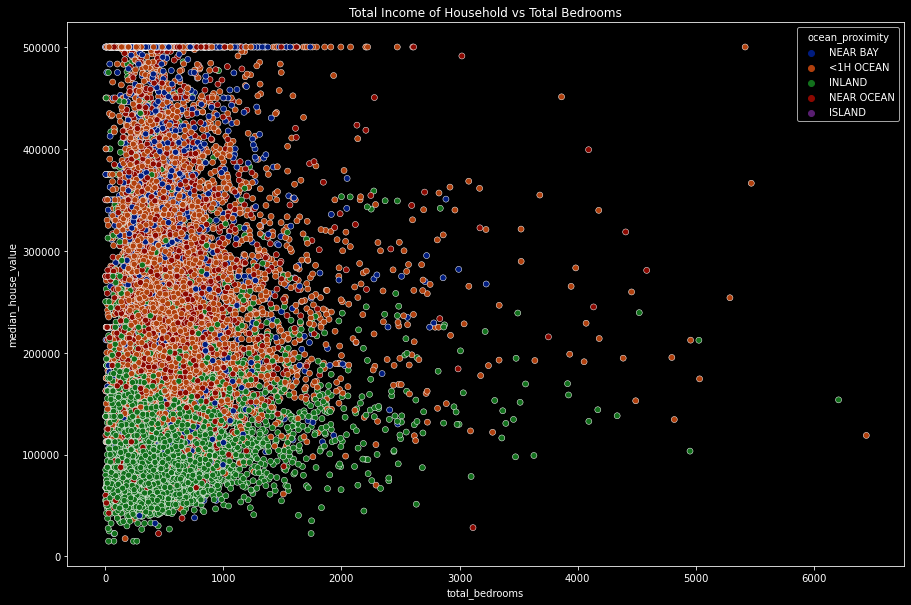

In [57]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'total_bedrooms', y = 'median_house_value',
                hue = 'ocean_proximity',palette= 'dark', data = df).set(title="Total Income of Household vs Total Bedrooms");

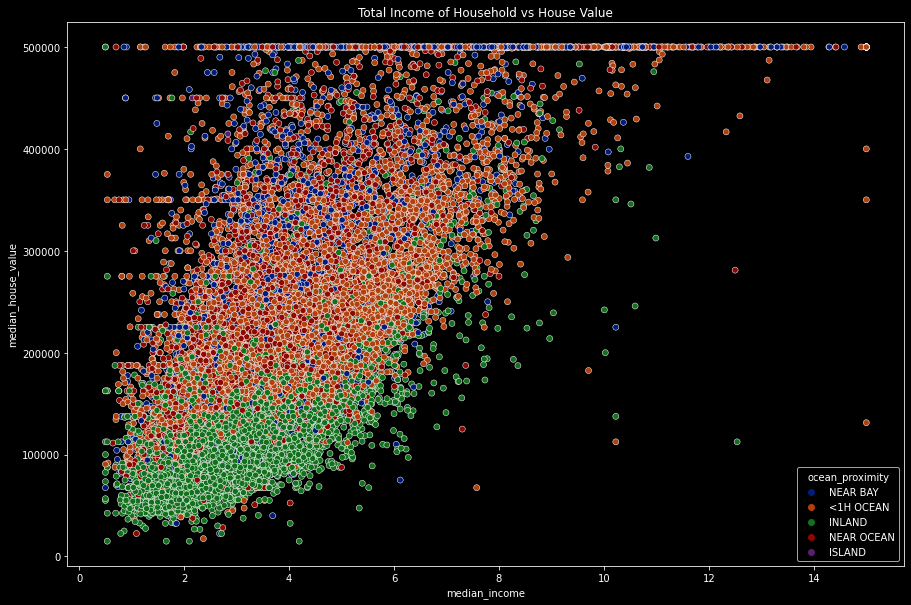

In [58]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x = 'median_income', y = 'median_house_value',
                hue = 'ocean_proximity',palette= 'dark', data = df).set(title="Total Income of Household vs House Value");

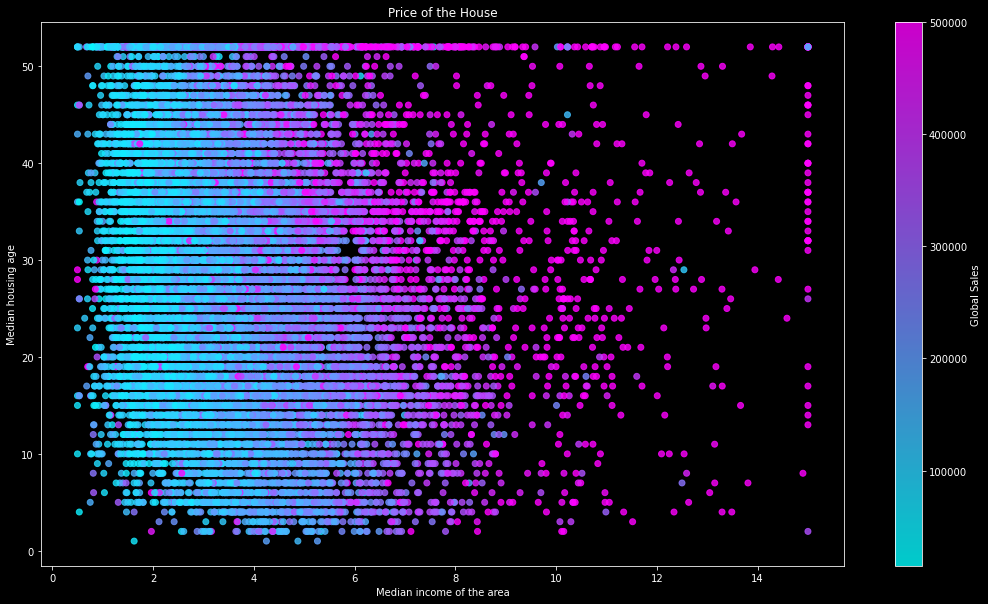

In [59]:
plt.figure(figsize=(18,10))
plt.scatter(df_shuff['median_income'],df_shuff['housing_median_age'],c=df_shuff['median_house_value'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Global Sales")
plt.title('Price of the House')
plt.style.use('dark_background')
plt.xlabel('Median income of the area')
plt.ylabel('Median housing age')
plt.show()